# Volume Profile的测试

In [13]:
import sys
sys.path.append("..")
from BacktestApp import BacktestApp

class TrendBacktestApp(BacktestApp):
    def __init__(self, config_file="config.yml", **kwargs):
        super().__init__(config_file, **kwargs)
        
    def on_bar_update(self, contract, bars, has_new_bar):
        bars = bars.copy()

try:
    ba = TrendBacktestApp(config_file="../config_backtest.yml", clientId=20, debug=True, autoConnect=False)
    end_date = "2025-03-18"
    duration_str = "200 D"
    # ba.minutes_backtest(end_date, duration_str)
    df = ba.read_offline_tick(ba.contracts[0], end_date)
finally:
    if ba.ib: pass
        # ba.ib.disconnect()

In [14]:
df_kline = ba.get_historical_data(ba.contracts[0], end_date)

c:\Users\Jagger\Documents\Code\short_term_trade\notebooks\..\PlotPlus.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_profile = df_tick.groupby('price_bin')['volume'].sum().reset_index()


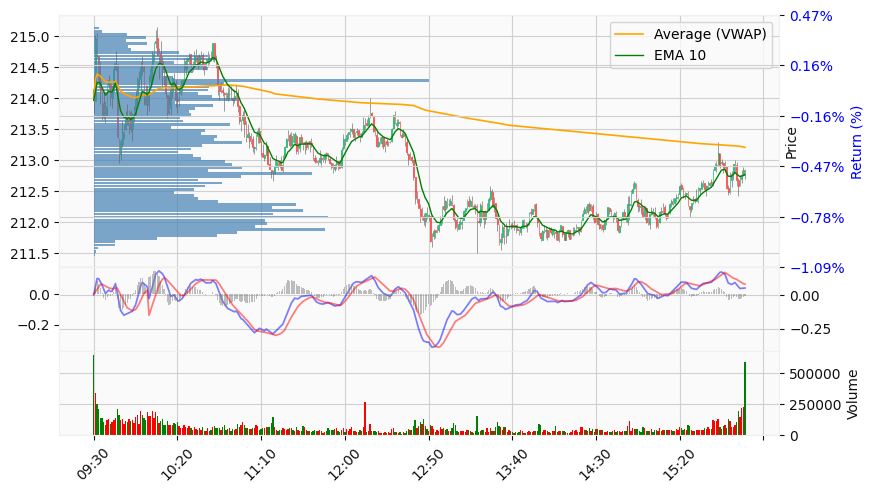

In [15]:
from PlotPlus import PlotPlus
pp = PlotPlus(df_kline)
pp.plot_basic(style_type="candle")
pp.plot_volume_profile(df, bin_size=0.05)
pp.show()

In [5]:
df_kline

,date,open,high,low,close,volume,average,barCount
0,2025-03-21 09:30:00-04:00,211.51,212.87,211.28,212.50,8972084,211.654,1886
1,2025-03-21 09:31:00-04:00,212.47,212.90,212.13,212.42,242649,212.494,1247
2,2025-03-21 09:32:00-04:00,212.42,212.42,211.71,211.81,194277,212.006,1098
3,2025-03-21 09:33:00-04:00,211.82,212.25,211.45,212.18,168979,211.905,1011
4,2025-03-21 09:34:00-04:00,212.18,212.81,212.12,212.67,139680,212.528,793
...,...,...,...,...,...,...,...,...
385,2025-03-21 15:55:00-04:00,217.31,218.38,217.25,218.14,837234,218.166,4562
386,2025-03-21 15:56:00-04:00,218.13,218.18,217.65,217.82,609151,217.941,3343
387,2025-03-21 15:57:00-04:00,217.84,218.03,217.82,217.94,607900,217.943,3124
388,2025-03-21 15:58:00-04:00,217.93,218.28,217.89,218.28,677287,218.037,3272
